<a href="https://colab.research.google.com/github/BeushevArtem/project/blob/main/April25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamNum
0,1,0,Работяга,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,Элита,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,Работяга,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,Элита,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,Работяга,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


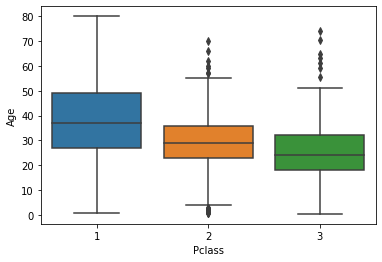

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
tit = pd.read_csv('titanic.csv') #SibSb - родственники 2 Parch - родственники 1 Fare - стоимость билета
x = tit['SibSp']
y = tit['Parch']
x = np.array(x)
y = np.array(y)
x=x+y
tit['FamNum'] = x

count=['Survived','Pclass','Age','SibSp','Parch','Fare','FamNum']
sns.boxplot(y='Age', x='Pclass', data=tit)

pd.pivot_table(tit, index=['Pclass'], values = ['Survived'], aggfunc=np.sum)
tit['Pclass'] = tit['Pclass'].replace([1,2,3],['Элита','Человек','Работяга'])
tit.head()

In [ ]:
tit.loc?